<a href="https://colab.research.google.com/github/DinalAdithya/Learning-PYTorch/blob/main/Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Network Classification
Prediction wether something is one thing or another

# Make claassification data and get it ready

In [1]:
import sklearn
from sklearn.datasets import make_circles

# make 1000 samples
n_samples = 1000

#Create circles
X, y = make_circles(n_samples,
                    noise= 0.03,
                    random_state=42)

len(X),len(y)

(1000, 1000)

In [2]:
print(f"First 5 samples of X: {X[:5]}")
print(f"First 5 samples of y: {y[:5]}")

First 5 samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: [1 1 1 1 0]


In [3]:
# make data frame of circle data
import pandas as pd
circles = pd.DataFrame({"x1":X[:, 0],
                        "x2":X[:, 1],
                        "label": y})
circles.head(10)

,x1,x2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


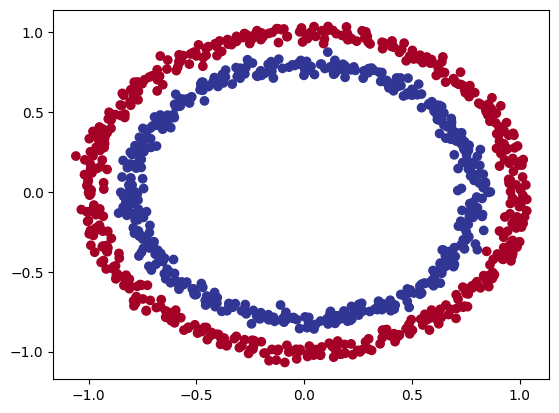

In [4]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

# Toy data set = small enough to experiment on sizeable enough to practice on

## Check input output shape

In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [7]:
# View the first example of features and lables
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of x: {X_sample} and the same for y:{y_sample}")
print(f"Shapes for one sample of x: {X_sample.shape} and the same for y:{y_sample.shape}")



Values for one sample of x: [0.75424625 0.23148074] and the same for y:1
Shapes for one sample of x: (2,) and the same for y:()


##Turn data into tensors and create train and test splits

In [8]:
import torch
import numpy as np

type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [9]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [10]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [11]:
# Split data into traning and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.2, # 0.2 = 20%0
                                                    random_state = 42 )# randome_state = random_seed but random seed does dose not work on skylearn

In [12]:
len(X_train), len(X_test), len(y_train), len(X_test)

(800, 200, 800, 200)

In [13]:
n_samples

1000

#Build a model

to classify  our blue and red dots.

1. device agnostic code
2. construct a model (by subclassing nn.module)
3. define a loss less
4. traning and test loop

In [14]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [15]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

## Constructing Model

1. Subclass nn.module(allmost all model in pytorch subclass nn.module)
2. create 2 nn.linear() layeers that are capble of handling the shapes of our data
3. define forwar() method that outline the forwar pass (or forwar computation of the model)
4. Instattiate an instance of our mode class and send it to the target device

In [16]:
# Constractor a model that subclasses nn.module
from sklearn import datasets

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # create 2 nn.linear()

    self.layer_1 = nn.Linear(in_features = 2, out_features = 5 ) # take in 2 features and upscale to 5 features
    self.layer_2 = nn.Linear(in_features = 5, out_features = 1 ) # in features oy layer 2 must match with out features of layer 1 [output single feature sa shape as y]

  # define forwar method
  def forward(self, X):
    return self.layer_2(self.layer_1(X)) # X -> Layer 1 -> Layer 2 -> out put

#Instattiate an instance of our mode class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0



CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
device,

('cuda',)

In [18]:
next(model_0.parameters()) # next() =  to get the first item of  the iterator

Parameter containing:
tensor([[-0.1091, -0.6942],
        [-0.6101,  0.3355],
        [ 0.0758, -0.0217],
        [-0.1540,  0.7012],
        [-0.3705, -0.1593]], device='cuda:0', requires_grad=True)

In [19]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [20]:
# Replicate the model above using nn.sequentioal [EZ method]

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [21]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.0611, -0.2106],
                      [-0.4540, -0.5054],
                      [ 0.4208,  0.5738],
                      [-0.4612,  0.4160],
                      [-0.6471, -0.2076]], device='cuda:0')),
             ('0.bias',
              tensor([ 0.3112,  0.3733,  0.4566, -0.1207,  0.2847], device='cuda:0')),
             ('1.weight',
              tensor([[0.2121, 0.4180, 0.2165, 0.3228, 0.1371]], device='cuda:0')),
             ('1.bias', tensor([-0.2856], device='cuda:0'))])

In [22]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions:{len(untrained_preds)}, Shape: {untrained_preds.shape} ")
print(f"Length of test samples: {len(X_test)},Shape:{X_test.shape}")
print(f"\nFirst 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 labes: \n{y_test[:10]}")

Length of predictions:200, Shape: torch.Size([200, 1]) 
Length of test samples: 200,Shape:torch.Size([200, 2])

First 10 predictions: 
tensor([[ 0.1390],
        [ 0.0055],
        [ 0.2707],
        [ 0.1026],
        [-0.0754],
        [-0.1542],
        [-0.2556],
        [-0.2939],
        [ 0.2851],
        [-0.0072]], device='cuda:0')

First 10 labes: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [23]:
X_test[:10],  y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

## Loss function

**For Regration** -> MAE or MSE [ mean absalute error or mean squard error ]

**For Classification** -> binary cross entropy or categorical cross entropy

**For Optimizer** -> SGD or Adam and more

In [24]:
#set up loss function
from torch import nn
# nn.BCELoss()
loss_fn = nn.BCEWithLogitsLoss() #sigmoid activation function built in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [25]:
# calculate accurasy - out of 100 examples what % does our model right

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc


## Train model

1. Forward Pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward  (Backpropagation)
5. Optimizer step (Gradiant descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model outputs are going to be raw **logits**.

converts **logits** into **prediction probabilities** by passing them from a function (sigmoid for binary classification & softmax for multiclass classification).

then convert our model's prediction probabilities to **prediction labels** either rounding them or taking the argmax().

In [26]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[ 0.1390],
        [ 0.0055],
        [ 0.2707],
        [ 0.1026],
        [-0.0754]], device='cuda:0')

In [27]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [28]:
# use sigmois activation function on our model logits to turn them into prediction probabilityes
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5347],
        [0.5014],
        [0.5673],
        [0.5256],
        [0.4811]], device='cuda:0')

In [29]:
# Find the predicted laybles
y_preds = torch.round(y_pred_probs)

# in full
y_preds_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_preds_labels.squeeze()))

tensor([True, True, True, True, True], device='cuda:0')


In [30]:
y_preds.squeeze()

tensor([1., 1., 1., 1., 0.], device='cuda:0')

### building trainning loop


In [31]:
#torch.menual_seed(42)   # can use both
torch.cuda.manual_seed(42)

# set the epochs
epochs = 100

#put the data to the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build traiining and evaluation loop
for epoch in range(epochs):
  ## Training
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze(dim=1)
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred laybl

  # 2. Calculate loos

  # loss = loss_fn(torch.sigmoid(y_logits,
  #                              y_train)) # nn.BCELoss expects prediction probabilities as input

  loss = loss_fn(y_logits,
                 y_train)
  acc =accuracy_fn(y_true = y_train,
                   y_pred= y_pred)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4.loss backward (backpropergation)
  loss.backward()

  # 5. optimizer step (gradiant descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():

    # 1. Forward pass
    test_logists = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logists))

    # 2. Test loss
    test_loss = loss_fn(test_logists,
                        y_test)
    test_acc = accuracy_fn(y_true = y_test,
                           y_pred = test_pred)

  # print
  if epoch % 10 == 0:
    print(f"Epochs : {epoch} | Loss : {loss:.5f} | Acc : {acc:.2f} | Test loss : {test_loss:.5f} | Test Acc : {test_acc:.2f} % ")



Epochs : 0 | Loss : 0.69957 | Acc : 50.38 | Test loss : 0.69455 | Test Acc : 50.50 % 
Epochs : 10 | Loss : 0.69771 | Acc : 50.12 | Test loss : 0.69394 | Test Acc : 49.50 % 
Epochs : 20 | Loss : 0.69645 | Acc : 50.12 | Test loss : 0.69368 | Test Acc : 49.50 % 
Epochs : 30 | Loss : 0.69557 | Acc : 50.00 | Test loss : 0.69360 | Test Acc : 49.00 % 
Epochs : 40 | Loss : 0.69493 | Acc : 50.50 | Test loss : 0.69363 | Test Acc : 48.00 % 
Epochs : 50 | Loss : 0.69447 | Acc : 50.50 | Test loss : 0.69371 | Test Acc : 48.50 % 
Epochs : 60 | Loss : 0.69412 | Acc : 50.00 | Test loss : 0.69382 | Test Acc : 51.00 % 
Epochs : 70 | Loss : 0.69386 | Acc : 49.75 | Test loss : 0.69394 | Test Acc : 51.00 % 
Epochs : 80 | Loss : 0.69367 | Acc : 49.38 | Test loss : 0.69406 | Test Acc : 53.50 % 
Epochs : 90 | Loss : 0.69352 | Acc : 49.88 | Test loss : 0.69418 | Test Acc : 52.00 % 


## 4. Make prediction and evaluate the model

From the metrics it looks like our model is'nt learning any thing...

So to inspect it  let's make some prediction and make them visual!



In [32]:
!wget https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py

--2024-01-02 12:59:16--  https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10160 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.92K  --.-KB/s    in 0s      

2024-01-02 12:59:17 (52.4 MB/s) - ‘helper_functions.py’ saved [10160/10160]



In [33]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists, skipping download


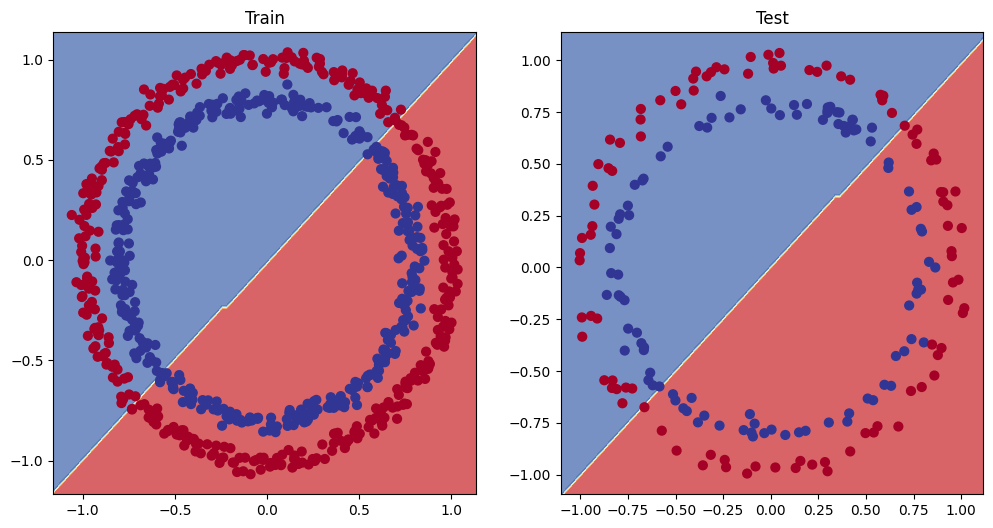

In [34]:
# Plot diceition boundry of the model
plt.figure(figsize = (12 , 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


## 5. Imporveing model (from a model prespective)

* Add more layers - give the model chances to learn
* Add more hidden units - 5 units to 10 units
* Fit for longer
* Changing the activation function [change sigmoid and check]
* change learning rate [ lr ]
* Change the loss function

These options from model's prespective rather than data.

And because these options are all values that we can change -> **Hyperparameter**

lets try to improve model by adding more
hiddenunits

* hidden unit 5 -> 10
* layers 2 -> 3
* epochs 100 -> 1000

In [37]:
class CircleModelV1(nn.Module): # / nn.Sequential()
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_feature=1)

  def forward(self, x):
    #z = self.layer_1(x)
    #z = self.layer_2(z)
    #z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # by riting like this we can lower the processing time

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [38]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create Optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr=0.1)


In [47]:
# evaluation and traning loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Train for longer
epochs = 1000

# put the data into taget device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ### Traning [1]
  model_1.train()

  # 1. Forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> prediction labyls

  # 2. Calculate the loss / acc [ acc-> optinal but loss -> not optinal ]
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                 y_pred=y_pred)

  # 3. Optimize the zero grad
  optimizer.zero_grad()

  # 4. Loss backwards (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradiant descent)
  optimizer.step()

  ### Testing [2]
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # 2. Calculate loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happaning
  if epoch % 100 == 0:
    print(f"Epoch : {epoch}, | Loss : {loss:.5f}, | Acc : {acc:.2f}%, | Test loss : {test_loss:.5f}, | Test Acc : {test_acc:.2f}%")


Epoch : 0, | Loss : 0.69912, | Acc : 43.50%, | Test loss : 0.69658, | Test Acc : 46.00%
Epoch : 100, | Loss : 0.69912, | Acc : 43.50%, | Test loss : 0.69658, | Test Acc : 46.00%
Epoch : 200, | Loss : 0.69912, | Acc : 43.50%, | Test loss : 0.69658, | Test Acc : 46.00%
Epoch : 300, | Loss : 0.69912, | Acc : 43.50%, | Test loss : 0.69658, | Test Acc : 46.00%
Epoch : 400, | Loss : 0.69912, | Acc : 43.50%, | Test loss : 0.69658, | Test Acc : 46.00%
Epoch : 500, | Loss : 0.69912, | Acc : 43.50%, | Test loss : 0.69658, | Test Acc : 46.00%
Epoch : 600, | Loss : 0.69912, | Acc : 43.50%, | Test loss : 0.69658, | Test Acc : 46.00%
Epoch : 700, | Loss : 0.69912, | Acc : 43.50%, | Test loss : 0.69658, | Test Acc : 46.00%
Epoch : 800, | Loss : 0.69912, | Acc : 43.50%, | Test loss : 0.69658, | Test Acc : 46.00%
Epoch : 900, | Loss : 0.69912, | Acc : 43.50%, | Test loss : 0.69658, | Test Acc : 46.00%


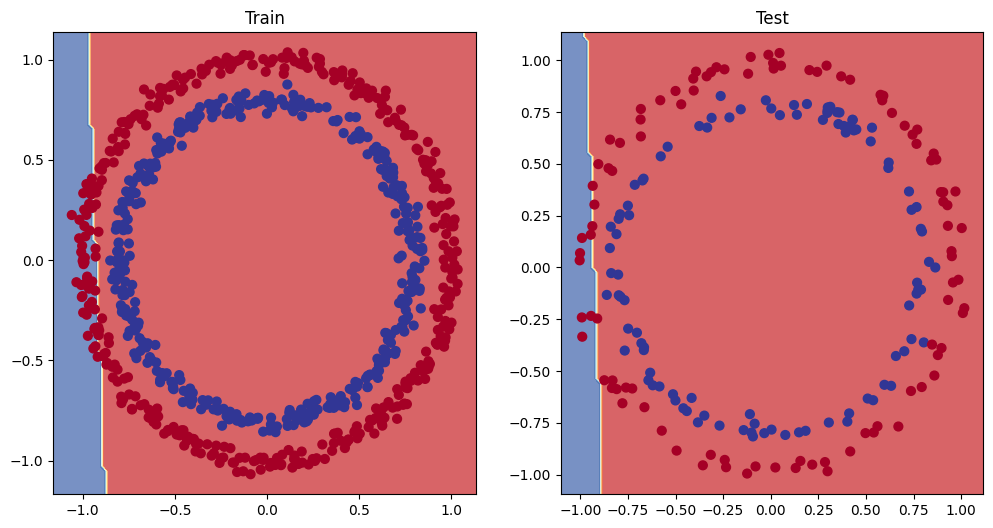

In [48]:
# Plot diceition boundry of the model
plt.figure(figsize = (12 , 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)
